<a href="https://colab.research.google.com/github/mbirnhak/DeepLearning-CyberAttackDetection/blob/main/MB_BS_CPSC360_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# All Necessary Imports
import csv
import sys
import os
import glob
import itertools
import numpy as np
import math
import pandas as pd
import tensorflow as tf
from collections import Counter
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, log_loss, accuracy_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix

In [ ]:
csv_1 = 'gdrive/My Drive/Datasets/MachineLearningCVE/WebAttacks.csv'
csv_2 = 'gdrive/My Drive/Datasets/MachineLearningCVE/PortScan_Attack.csv'
csv_3 = 'gdrive/My Drive/Datasets/MachineLearningCVE/FTP_SSH_Brute_Force.csv'
csv_4 = 'gdrive/My Drive/Datasets/MachineLearningCVE/Dos_Attack.csv'
csv_5 = 'gdrive/My Drive/Datasets/MachineLearningCVE/DDos_Attack.csv'
csv_6 = 'gdrive/My Drive/Datasets/MachineLearningCVE/Bot_Attack.csv'

df1 = pd.read_csv(csv_1, na_values=['NA','?'])
df2 = pd.read_csv(csv_2, na_values=['NA','?'])
df3 = pd.read_csv(csv_3, na_values=['NA','?'])
df4 = pd.read_csv(csv_4, na_values=['NA','?'])
df5 = pd.read_csv(csv_5, na_values=['NA','?'])
df6 = pd.read_csv(csv_6, na_values=['NA','?'])

# df1.head(5)

In [ ]:
replace_dict1 = {
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack'
}
df1[' Label'] = df1[' Label'].replace(replace_dict1)

replace_dict2 = {
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force'
}
df3[' Label'] = df3[' Label'].replace(replace_dict2)

replace_dict3 = {
    'DoS Hulk': 'Dos Attack',
    'DoS GoldenEye': 'Dos Attack',
    'DoS slowloris': 'Dos Attack',
    'DoS Slowhttptest': 'Dos Attack',
    'Heartbleed': 'Dos Attack'
}
df4[' Label'] = df4[' Label'].replace(replace_dict3)

In [ ]:
Web_Attack_Dist = Counter(df1[' Label'])
print(Web_Attack_Dist)

PortScan_Attack_Dist = Counter(df2[' Label'])
print(PortScan_Attack_Dist)

Brute_Force_Attack_Dist = Counter(df3[' Label'])
print(Brute_Force_Attack_Dist)

Dos_Attack_Dist = Counter(df4[' Label'])
print(Dos_Attack_Dist)

DDos_Attack_Dist = Counter(df5[' Label'])
print(DDos_Attack_Dist)

Bot_Attack_Dist = Counter(df6[' Label'])
print(Bot_Attack_Dist)

Counter({'BENIGN': 168186, 'Web Attack': 2180})
Counter({'PortScan': 158930, 'BENIGN': 127537})
Counter({'BENIGN': 432074, 'Brute Force': 13835})
Counter({'BENIGN': 440031, 'Dos Attack': 252672})
Counter({'DDoS': 128027, 'BENIGN': 97718})
Counter({'BENIGN': 189067, 'Bot': 1966})


In [ ]:
# Replace inf values in 'Flow Bytes/s' and ' Flow Packets/s' columns in all dataframes
dataframes = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(dataframes):
    # Replace inf values with max non-infinite value in 'Flow Bytes/s'
    max_bytes = df['Flow Bytes/s'][~np.isinf(df['Flow Bytes/s'])].max()
    df['Flow Bytes/s'] = df['Flow Bytes/s'].replace(np.inf, max_bytes)

    # Replace inf values with max non-infinite value in ' Flow Packets/s'
    max_packets = df[' Flow Packets/s'][~np.isinf(df[' Flow Packets/s'])].max()
    df[' Flow Packets/s'] = df[' Flow Packets/s'].replace(np.inf, max_packets)

    # Print checks
    print(f"DataFrame {i+1} - 'Flow Bytes/s' inf count:", np.isinf(df['Flow Bytes/s']).sum())
    print(f"DataFrame {i+1} - ' Flow Packets/s' inf count:", np.isinf(df[' Flow Packets/s']).sum())
    print(f"DataFrame {i+1} - 'Flow Bytes/s' max:", df['Flow Bytes/s'].max())
    print(f"DataFrame {i+1} - ' Flow Packets/s' max:", df[' Flow Packets/s'].max())

DataFrame 1 - 'Flow Bytes/s' inf count: 0
DataFrame 1 - ' Flow Packets/s' inf count: 0
DataFrame 1 - 'Flow Bytes/s' max: 2070000000.0
DataFrame 1 - ' Flow Packets/s' max: 3000000.0
DataFrame 2 - 'Flow Bytes/s' inf count: 0
DataFrame 2 - ' Flow Packets/s' inf count: 0
DataFrame 2 - 'Flow Bytes/s' max: 2070000000.0
DataFrame 2 - ' Flow Packets/s' max: 3000000.0
DataFrame 3 - 'Flow Bytes/s' inf count: 0
DataFrame 3 - ' Flow Packets/s' inf count: 0
DataFrame 3 - 'Flow Bytes/s' max: 2070000000.0
DataFrame 3 - ' Flow Packets/s' max: 3000000.0
DataFrame 4 - 'Flow Bytes/s' inf count: 0
DataFrame 4 - ' Flow Packets/s' inf count: 0
DataFrame 4 - 'Flow Bytes/s' max: 2070000000.0
DataFrame 4 - ' Flow Packets/s' max: 3000000.0
DataFrame 5 - 'Flow Bytes/s' inf count: 0
DataFrame 5 - ' Flow Packets/s' inf count: 0
DataFrame 5 - 'Flow Bytes/s' max: 2070000000.0
DataFrame 5 - ' Flow Packets/s' max: 3000000.0
DataFrame 6 - 'Flow Bytes/s' inf count: 0
DataFrame 6 - ' Flow Packets/s' inf count: 0
DataFram

In [ ]:
normalize_columns=[' Flow Duration',' Total Fwd Packets',' Total Backward Packets', 'Total Length of Fwd Packets',
' Total Length of Bwd Packets', ' Fwd Packet Length Max',' Fwd Packet Length Min', ' Fwd Packet Length Mean',
' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets',
' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
' act_data_pkt_fwd', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
' Idle Min']
drop_columns = ['Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

for df in dataframes:
  df.dropna(axis=0, inplace=True)
  df.drop(columns=drop_columns, inplace=True)
  df[normalize_columns] = df[normalize_columns].apply((lambda x: (x-x.min())/(x.max()-x.min())))

In [ ]:
print(df1['Flow Bytes/s'].isna().sum())

0


In [ ]:
new_dfs = []
for df in dataframes:
  new_dfs.append(df[df[' Label'] != 'BENIGN'].sample(n=1966, random_state=42))
  new_dfs.append(df[df[' Label'] == 'BENIGN'].sample(n=328, random_state=42))

df = pd.concat(new_dfs)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

final_df = Counter(df[' Label'])
print(final_df)

Counter({'BENIGN': 1968, 'Brute Force': 1966, 'PortScan': 1966, 'DDoS': 1966, 'Web Attack': 1966, 'Dos Attack': 1966, 'Bot': 1966})


In [ ]:
print(df.isna().any().any())

False


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy[' Label'] = df_copy[' Label'].map({'BENIGN':0, 'Web Attack':1, 'PortScan':2, 'Brute Force':3, 'Dos Attack':4, 'DDoS':5, 'Bot':6})
df_copy[' Label'].head(10)

0    3
1    3
2    2
3    5
4    1
5    2
6    0
7    4
8    3
9    1
Name:  Label, dtype: int64

In [ ]:
x_columns = df_copy.columns.drop(' Label')
x = df[x_columns].values
y = df_copy[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
%matplotlib inline
def report_coef(names,coef,intercept):
  r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0 },
                   index = names )
  r = r.sort_values(by=['coef'])
  display(r)
  print(f"Intercept: {intercept}")
  r['coef'].plot(kind='barh', color=r['positive'].map(
      {True: 'b', False: 'r'}))

Final score (RMSE): 3.633893950840157


,coef,positive
Subflow Bwd Bytes,-1.651084e+07,False
Subflow Bwd Packets,-1.375545e+03,False
Total Backward Packets,-1.314804e+03,False
Fwd Header Length,-6.786838e+02,False
Fwd Header Length.1,-6.749956e+02,False
...,...,...
act_data_pkt_fwd,1.086404e+02,True
Subflow Fwd Packets,9.275008e+02,True
Total Fwd Packets,9.326167e+02,True
Bwd Header Length,1.358355e+03,True


Intercept: -15.17345303492282


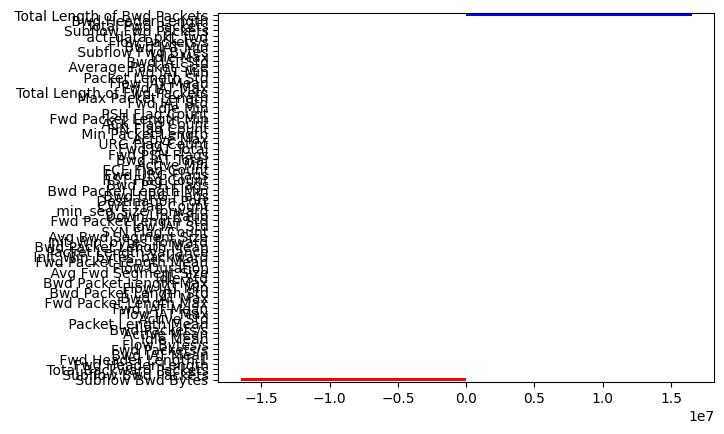

In [ ]:
# Create Lasso regression model to determine columns to drop
regressor = linear_model.LinearRegression()
# Train Lasso
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE
score = np.sqrt(mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
    x_columns,
    regressor.coef_,
    regressor.intercept_)

In [ ]:
x_columns = df_copy.columns.drop(' Label')
x = df_copy[x_columns].values
dummies = pd.get_dummies(df_copy[' Label'])
y = dummies.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model1 = Sequential()
model1.add(Dense(128, input_dim=x.shape[1], activation='relu')) # Hidden 1
model1.add(Dense(64, activation='relu')) # Hidden 2
model1.add(Dense(32, activation='relu')) # Hidden 3
model1.add(Dense(y.shape[1],activation='softmax')) # Output
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,verbose=2, mode='auto', restore_best_weights=True)
model1.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

pred = model1.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
score = metrics.accuracy_score(y_compare, pred)
print(f"Score (accuracy): {score}")

Epoch 1/100
345/345 [==============================] - 3s 4ms/step - loss: 16.9981 - accuracy: 0.6019 - val_loss: 14.2497 - val_accuracy: 0.6952
Epoch 2/100
345/345 [==============================] - 1s 4ms/step - loss: 6.7470 - accuracy: 0.7497 - val_loss: 3.2921 - val_accuracy: 0.7181
Epoch 3/100
345/345 [==============================] - 1s 4ms/step - loss: 7.7227 - accuracy: 0.7701 - val_loss: 3.7286 - val_accuracy: 0.7650
Epoch 4/100
345/345 [==============================] - 1s 4ms/step - loss: 3.4218 - accuracy: 0.8013 - val_loss: 2.1163 - val_accuracy: 0.8660
Epoch 5/100
345/345 [==============================] - 1s 4ms/step - loss: 3.0612 - accuracy: 0.8085 - val_loss: 2.2274 - val_accuracy: 0.7722
Epoch 6/100
345/345 [==============================] - 2s 5ms/step - loss: 3.0756 - accuracy: 0.8082 - val_loss: 1.4274 - val_accuracy: 0.7679
Epoch 7/100
345/345 [==============================] - 2s 5ms/step - loss: 1.9704 - accuracy: 0.8088 - val_loss: 0.7913 - val_accuracy: 0.81

In [ ]:
target_names = ['BENIGN', 'Web Attack', 'PortScan', 'Brute Force', 'Dos Attack', 'DDoS', 'Bot']
report = classification_report(y_compare, pred, target_names=target_names)

print("Model 1: Multiclass Classification (small)\n")
print(report)

Model 1: Multiclass Classification (small)

              precision    recall  f1-score   support

      BENIGN       0.95      0.77      0.85       412
  Web Attack       1.00      0.98      0.99       415
    PortScan       0.98      0.46      0.63       368
 Brute Force       1.00      1.00      1.00       392
  Dos Attack       0.95      1.00      0.97       393
        DDoS       0.98      1.00      0.99       395
         Bot       0.60      1.00      0.75       378

    accuracy                           0.89      2753
   macro avg       0.92      0.89      0.88      2753
weighted avg       0.92      0.89      0.89      2753



In [ ]:
#Generate the confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix',
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[318   0   3   1   9   6  75]
 [  0 405   0   0  10   0   0]
 [ 17   1 169   0   0   0 181]
 [  0   0   0 392   0   0   0]
 [  0   1   0   0 392   0   0]
 [  0   0   0   0   1 394   0]
 [  0   0   0   0   0   0 378]]


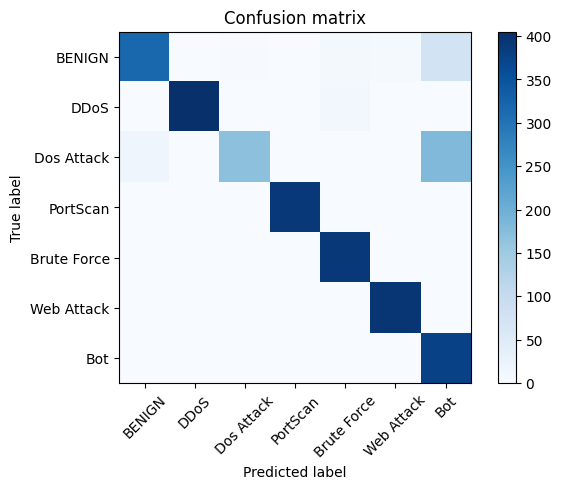

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ['BENIGN', 'DDoS', 'Dos Attack','PortScan','Brute Force','Web Attack','Bot'])

In [ ]:
# Increase amount of data to 13835 (3rd smallest number of attacks) from available datasets
dataframes = [df2, df3, df4, df5]
new_dfs = []
for df in dataframes:
  new_dfs.append(df[df[' Label'] != 'BENIGN'].sample(n=13835, random_state=42))
  new_dfs.append(df[df[' Label'] == 'BENIGN'].sample(n=2306, random_state=42))

# Web Attack dataset only has 2180 Web Attacks
new_dfs.append(df1[df1[' Label'] != 'BENIGN'].sample(n=2180, random_state=42))
new_dfs.append(df1[df1[' Label'] == 'BENIGN'].sample(n=2306, random_state=42))
# Bot Attack dataset only has 1966 Bot Attacks
new_dfs.append(df6[df6[' Label'] != 'BENIGN'].sample(n=1966, random_state=42))
new_dfs.append(df6[df6[' Label'] == 'BENIGN'].sample(n=2305, random_state=42))

df = pd.concat(new_dfs)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

final_df = Counter(df[' Label'])
print(final_df)

Counter({'BENIGN': 13835, 'Dos Attack': 13835, 'DDoS': 13835, 'Brute Force': 13835, 'PortScan': 13835, 'Web Attack': 2180, 'Bot': 1966})


In [ ]:
df_copy = df.copy()

In [ ]:
x_columns = df_copy.columns.drop(' Label')
x = df_copy[x_columns].values
dummies = pd.get_dummies(df_copy[' Label'])
y = dummies.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model2 = Sequential()
model2.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model2.add(Dense(25,activation='relu')) # Hidden 2
model2.add(Dense(10,activation='relu')) # Hidden 3
model2.add(Dense(y_train.shape[1],activation='softmax')) # Output
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,verbose=2, mode='auto', restore_best_weights=True)
model2.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

pred = model2.predict(x_test)
pred_arg = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred_arg)
print("Accuracy score: {}".format(score))

Epoch 1/100
1833/1833 [==============================] - 12s 5ms/step - loss: 7.6079 - accuracy: 0.6158 - val_loss: 0.6474 - val_accuracy: 0.8457
Epoch 2/100
1833/1833 [==============================] - 7s 4ms/step - loss: 0.4789 - accuracy: 0.8660 - val_loss: 0.3831 - val_accuracy: 0.8834
Epoch 3/100
1833/1833 [==============================] - 8s 4ms/step - loss: 0.3571 - accuracy: 0.8848 - val_loss: 0.3425 - val_accuracy: 0.8725
Epoch 4/100
1833/1833 [==============================] - 9s 5ms/step - loss: 0.3588 - accuracy: 0.8745 - val_loss: 0.3189 - val_accuracy: 0.8774
Epoch 5/100
1833/1833 [==============================] - 7s 4ms/step - loss: 0.3113 - accuracy: 0.8787 - val_loss: 0.3099 - val_accuracy: 0.8756
Epoch 6/100
1833/1833 [==============================] - 8s 4ms/step - loss: 0.2993 - accuracy: 0.8817 - val_loss: 0.3183 - val_accuracy: 0.8762
Epoch 7/100
1833/1833 [==============================] - 7s 4ms/step - loss: 0.2715 - accuracy: 0.9061 - val_loss: 0.2960 - val_a

In [ ]:
target_names = ['BENIGN', 'Web Attack', 'PortScan', 'Brute Force', 'Dos Attack', 'DDoS', 'Bot']
report = classification_report(y_compare, pred_arg, target_names=target_names)

print("Model 2: Multiclass Classification (medium)\n")
print(report)

Model 2: Multiclass Classification (medium)

              precision    recall  f1-score   support

      BENIGN       1.00      0.72      0.84      2783
  Web Attack       0.00      0.00      0.00       369
    PortScan       1.00      1.00      1.00      2705
 Brute Force       0.97      1.00      0.98      2803
  Dos Attack       0.98      0.98      0.98      2794
        DDoS       0.73      1.00      0.84      2775
         Bot       0.92      0.98      0.95       436

    accuracy                           0.92     14665
   macro avg       0.80      0.81      0.80     14665
weighted avg       0.91      0.92      0.91     14665



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix
[[2007    0    2   59   36  655   24]
 [   0    0    0    0    0  369    0]
 [   1    0 2704    0    0    0    0]
 [   1    0    0 2800    2    0    0]
 [   2    0    0   35 2751    0    6]
 [   3    0    0    0    2 2764    6]
 [   0    0    0    0    7    0  429]]


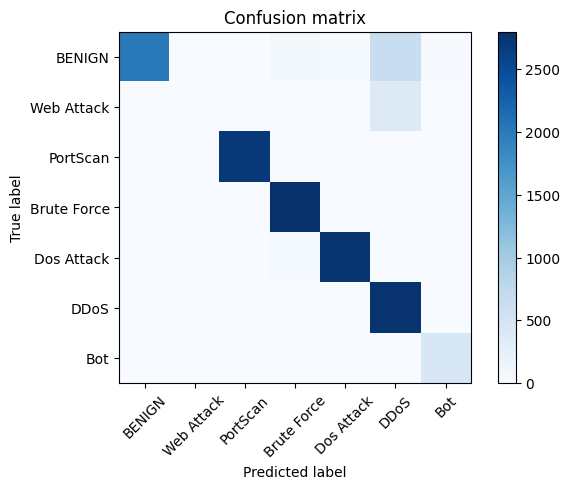

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_compare, pred_arg)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ['BENIGN', 'Web Attack', 'PortScan', 'Brute Force', 'Dos Attack', 'DDoS', 'Bot'])

In [ ]:
# Increase amount of data to 128027 (4th smallest number of attacks) from available datasets
dataframes = [df2, df4, df5]
new_dfs = []
for df in dataframes:
  new_dfs.append(df[df[' Label'] != 'BENIGN'].sample(n=128027, random_state=42))
  new_dfs.append(df[df[' Label'] == 'BENIGN'].sample(n=30000, random_state=42))

# Web Attack dataset only has 2180 Web Attacks
new_dfs.append(df1[df1[' Label'] != 'BENIGN'].sample(n=2180, random_state=42))
new_dfs.append(df1[df1[' Label'] == 'BENIGN'].sample(n=2180, random_state=42))
# Brute Force Attack dataset only has 13835 Brute Force Attacks
new_dfs.append(df3[df3[' Label'] != 'BENIGN'].sample(n=13835, random_state=42))
new_dfs.append(df3[df3[' Label'] == 'BENIGN'].sample(n=13835, random_state=42))
# Bot Attack dataset only has 1966 Bot Attacks
new_dfs.append(df6[df6[' Label'] != 'BENIGN'].sample(n=1966, random_state=42))
new_dfs.append(df6[df6[' Label'] == 'BENIGN'].sample(n=1966, random_state=42))

df = pd.concat(new_dfs)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

final_df = Counter(df[' Label'])
print(final_df)

Counter({'DDoS': 128027, 'PortScan': 128027, 'Dos Attack': 128027, 'BENIGN': 107981, 'Brute Force': 13835, 'Web Attack': 2180, 'Bot': 1966})


In [ ]:
df_copy = df.copy()

In [ ]:
x_columns = df_copy.columns.drop(' Label')
x = df_copy[x_columns].values
dummies = pd.get_dummies(df_copy[' Label'])
y = dummies.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model3 = Sequential()
model3.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model3.add(Dropout(0.5))
model3.add(Dense(25,activation='relu')) # Hidden 2
model3.add(Dense(10,activation='relu')) # Hidden 3
model3.add(Dense(y_train.shape[1],activation='softmax')) # Output
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,verbose=2, mode='auto', restore_best_weights=True)
model3.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

pred = model3.predict(x_test)
pred_arg = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred_arg)
print("Accuracy score: {}".format(score))

Epoch 1/100
12752/12752 [==============================] - 60s 5ms/step - loss: 3.7493 - accuracy: 0.6902 - val_loss: 0.3139 - val_accuracy: 0.8739
Epoch 2/100
12752/12752 [==============================] - 52s 4ms/step - loss: 0.3358 - accuracy: 0.8684 - val_loss: 0.2785 - val_accuracy: 0.8857
Epoch 3/100
12752/12752 [==============================] - 54s 4ms/step - loss: 0.3044 - accuracy: 0.8783 - val_loss: 0.2731 - val_accuracy: 0.8886
Epoch 4/100
12752/12752 [==============================] - 53s 4ms/step - loss: 0.2927 - accuracy: 0.8813 - val_loss: 0.2904 - val_accuracy: 0.8874
Epoch 5/100
12752/12752 [==============================] - 58s 5ms/step - loss: 0.2818 - accuracy: 0.8834 - val_loss: 0.2592 - val_accuracy: 0.8888
Epoch 6/100
12752/12752 [==============================] - 53s 4ms/step - loss: 0.2843 - accuracy: 0.8837 - val_loss: 0.3101 - val_accuracy: 0.8783
Epoch 7/100
12752/12752 [==============================] - 53s 4ms/step - loss: 0.2770 - accuracy: 0.8853 - val_

In [ ]:
target_names = ['BENIGN', 'Web Attack', 'PortScan', 'Brute Force', 'Dos Attack', 'DDoS', 'Bot']
report = classification_report(y_compare, pred_arg, target_names=target_names)

print("Model 3: Multiclass Classification (large)\n")
print(report)

Model 3: Multiclass Classification (large)

              precision    recall  f1-score   support

      BENIGN       0.95      0.53      0.68     21689
  Web Attack       0.00      0.00      0.00       369
    PortScan       1.00      1.00      1.00      2796
 Brute Force       0.99      1.00      0.99     25512
  Dos Attack       0.99      0.98      0.99     25644
        DDoS       0.71      0.99      0.83     25542
         Bot       0.92      0.84      0.88       457

    accuracy                           0.89    102009
   macro avg       0.79      0.76      0.77    102009
weighted avg       0.91      0.89      0.88    102009



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix
[[11576     0     9   128   153  9793    30]
 [    0     0     0     0     0   369     0]
 [    2     0  2794     0     0     0     0]
 [   20     0     0 25481     9     2     0]
 [  263     0     0   171 25207     3     0]
 [  291     0     0     0    22 25227     2]
 [   68     0     0     0     7     0   382]]


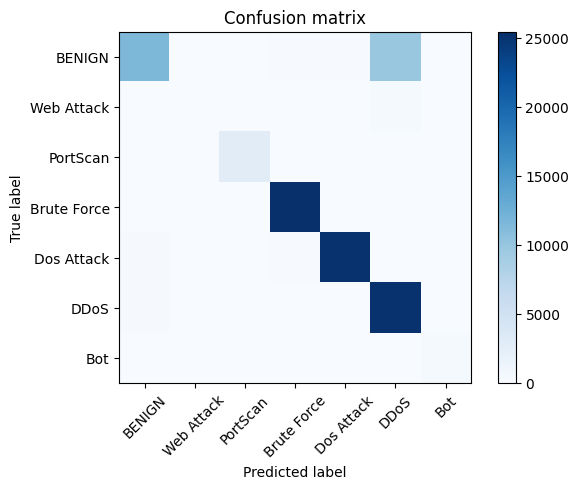

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_compare, pred_arg)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ['BENIGN', 'Web Attack', 'PortScan', 'Brute Force', 'Dos Attack', 'DDoS', 'Bot'])

In [ ]:
df1[' Label'] = df1[' Label'].map({'BENIGN':0,'Web Attack':1})
df2[' Label'] = df2[' Label'].map({'BENIGN':0,'PortScan':1})
df3[' Label'] = df3[' Label'].map({'BENIGN':0,'Brute Force':1})
df4[' Label'] = df4[' Label'].map({'BENIGN':0,'Dos Attack':1})
df5[' Label'] = df5[' Label'].map({'BENIGN':0,'DDoS':1})
df6[' Label'] = df6[' Label'].map({'BENIGN':0,'Bot':1})

In [ ]:
df_1 = df1.copy()
df_2 = df2.copy()
df_3 = df3.copy()
df_4 = df4.copy()
df_5 = df5.copy()
df_6 = df6.copy()

In [ ]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(title,pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} ROC Graph')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Include equal amount of attack and benign for binary model
new_dfs = []
new_dfs.append(df1[df1[' Label'] != 0].sample(n=2180, random_state=42))
new_dfs.append(df1[df1[' Label'] == 0].sample(n=2180, random_state=42))

df_1 = pd.concat(new_dfs)
df_1 = df_1.sample(frac=1, random_state=42).reset_index(drop=True)
Counter(df_1[' Label'])

Counter({1: 2180, 0: 2180})

In [ ]:
# Binary for Web Attack

x_columns = df_1.columns.drop(' Label')
x = df_1[x_columns].values
y = df_1[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

bin_model1 = Sequential()
bin_model1.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
bin_model1.add(Dense(1,activation='sigmoid'))
bin_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto', restore_best_weights=True)
bin_model1.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Epoch 1/100
109/109 [==============================] - 3s 5ms/step - loss: 0.5378 - accuracy: 0.8360 - val_loss: 0.5111 - val_accuracy: 0.8647
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.8693 - val_loss: 0.4876 - val_accuracy: 0.8658
Epoch 3/100
109/109 [==============================] - 1s 5ms/step - loss: 0.4861 - accuracy: 0.8653 - val_loss: 0.4636 - val_accuracy: 0.8452
Epoch 4/100
109/109 [==============================] - 1s 7ms/step - loss: 0.4601 - accuracy: 0.8635 - val_loss: 0.4430 - val_accuracy: 0.8452
Epoch 5/100
109/109 [==============================] - 1s 9ms/step - loss: 0.4374 - accuracy: 0.8627 - val_loss: 0.4232 - val_accuracy: 0.8555
Epoch 6/100
109/109 [==============================] - 1s 11ms/step - loss: 0.4161 - accuracy: 0.8621 - val_loss: 0.4058 - val_accuracy: 0.8475
Epoch 7/100
109/109 [==============================] - 1s 11ms/step - loss: 0.3988 - accuracy: 0.8610 - val_loss: 0.3918 - val_accuracy: 0.84

In [ ]:
# Compute accuracy score
pred = bin_model1.predict(x_test)
threshold = 0.45
correct = 0
pred2 = []

for p in pred:
  if p > threshold:
    pred2.append(1)
  else:
    pred2.append(0)

for predicted_label, true_label in zip(pred2, y_test):
    if predicted_label == true_label:
        correct += 1

print(f"Accuracy: {correct/len(y_test)}")
score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

28/28 [==============================] - 0s 2ms/step
Accuracy: 0.9908256880733946
Log loss score: 0.04197229972862912


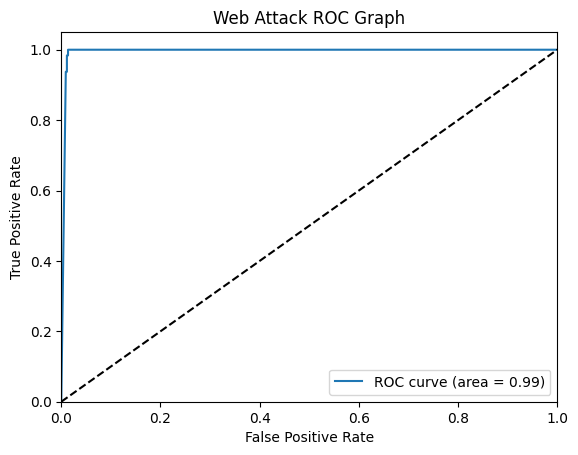

In [ ]:
plot_roc('Web Attack',pred,y_test)

In [ ]:
target_names = ['BENIGN', 'Web Attack']
report = classification_report(y_test, pred2, target_names=target_names)

print("Model 4: Binary Classification (Web Attack)\n")
print(report)

Model 4: Binary Classification (Web Attack)

              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99       441
  Web Attack       0.98      1.00      0.99       431

    accuracy                           0.99       872
   macro avg       0.99      0.99      0.99       872
weighted avg       0.99      0.99      0.99       872



In [ ]:
#Prepare data for Web Attack Autoencoder Model
benign_data = df1[df1[' Label'] == 0]
attack_data = df1[df1[' Label'] == 1]

# Split BENIGN data into training and test sets
train_benign, test_benign = train_test_split(benign_data, test_size=0.1, random_state=42)

# Use all attack instances in the test set
test_data = pd.concat([test_benign, attack_data])

# Shuffle the training and test datasets
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True) # test_data = BENIGN mixed  with web attacks
normal_traffic_data = train_benign.sample(frac=1, random_state=42).reset_index(drop=True) # normal_traffic_data = JUST BENIGN

x_columns = normal_traffic_data.columns.drop(' Label')
x_train = normal_traffic_data[x_columns].values
# y_train = normal_traffic_data[' Label'].values

x_test = test_data[x_columns].values
y_test = test_data[' Label'].values

input_shape = x_train.shape[1]

In [ ]:
#Web Attack Autoencoder Model

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

pipeline.fit(x_train)
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)
input_dim = x_train_transformed.shape[1]

BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(2, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = autoencoder.fit(
    x_train_transformed, x_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[monitor],
    validation_data=(x_test_transformed, x_test_transformed)
)

Epoch 1/100
592/592 [==============================] - 7s 7ms/step - loss: 0.0028 - acc: 0.9708 - val_loss: 0.0020 - val_acc: 0.9891
Epoch 2/100
592/592 [==============================] - 3s 5ms/step - loss: 0.0011 - acc: 0.9871 - val_loss: 0.0012 - val_acc: 0.9927
Epoch 3/100
592/592 [==============================] - 3s 5ms/step - loss: 8.7858e-04 - acc: 0.9906 - val_loss: 0.0012 - val_acc: 0.9928
Epoch 4/100
592/592 [==============================] - 3s 5ms/step - loss: 8.3897e-04 - acc: 0.9906 - val_loss: 0.0011 - val_acc: 0.9928
Epoch 5/100
592/592 [==============================] - 3s 6ms/step - loss: 7.2583e-04 - acc: 0.9899 - val_loss: 9.6418e-04 - val_acc: 0.9928
Epoch 6/100
592/592 [==============================] - 4s 6ms/step - loss: 5.7137e-04 - acc: 0.9905 - val_loss: 8.4754e-04 - val_acc: 0.9926
Epoch 7/100
592/592 [==============================] - 3s 5ms/step - loss: 5.2459e-04 - acc: 0.9905 - val_loss: 7.8285e-04 - val_acc: 0.9927
Epoch 8/100
592/592 [================

In [ ]:
reconstructed_data = autoencoder.predict(x_test_transformed)
mse = np.mean(np.square(x_test_transformed - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)  # Example threshold

# Identify anomalies based on threshold
anomalies = mse > threshold

594/594 [==============================] - 1s 2ms/step


In [ ]:
# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, mse)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, anomalies).ravel()

# Calculate precision, recall, and F1-score using a threshold
# Choose threshold based on precision-recall curve or custom value
custom_threshold = 0.5  # Example threshold
anomalies_custom = mse > custom_threshold
precision_custom = precision_score(y_test, anomalies_custom)
recall_custom = recall_score(y_test, anomalies_custom)
f1_custom = f1_score(y_test, anomalies_custom)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print AUC-ROC
print(f"AUC-ROC: {auc_roc}")
# Print Confusion Matrix
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

AUC-ROC: 0.9648970051602436
True Negatives: 16622, False Positives: 195, False Negatives: 2179, True Positives: 1


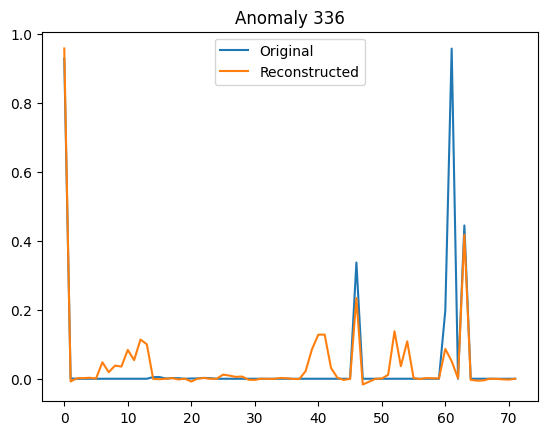

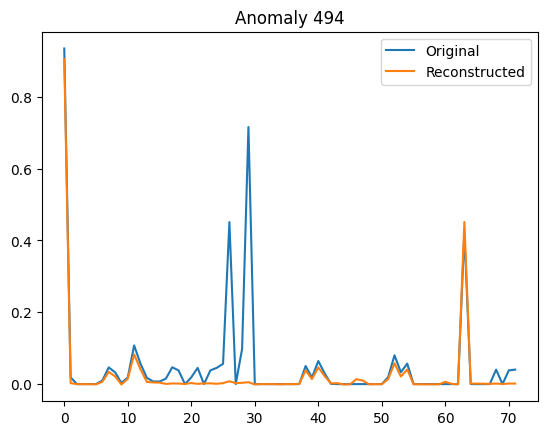

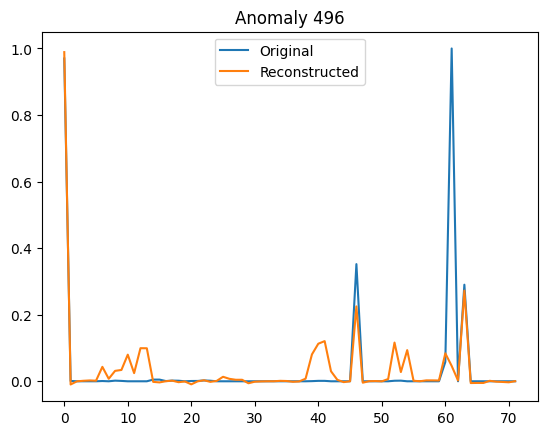

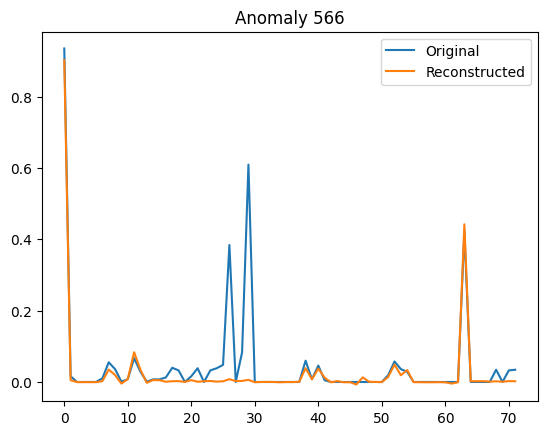

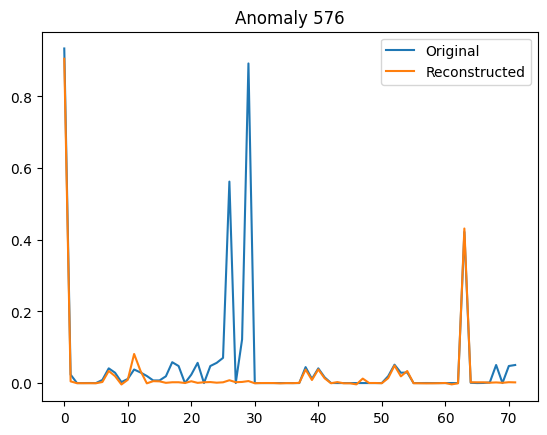

In [ ]:
# Visualize reconstructed vs. original data for anomalies
anomaly_indices = np.where(anomalies)[0][:5]  # Choose first 5 anomalies for visualization
for idx in anomaly_indices:
    plt.figure()
    plt.title(f"Anomaly {idx}")
    plt.plot(x_test_transformed[idx], label='Original')
    plt.plot(reconstructed_data[idx], label='Reconstructed')
    plt.legend()
    plt.show()

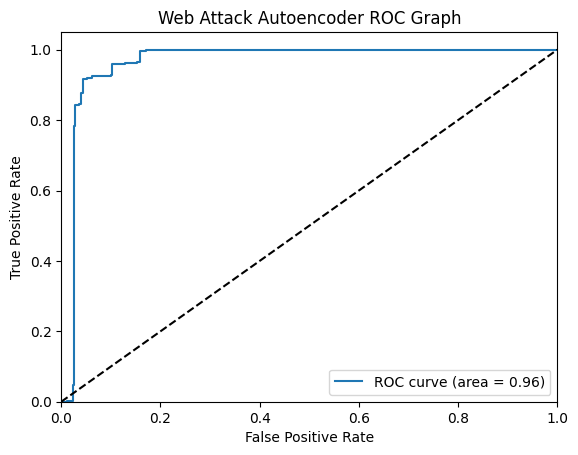

In [ ]:
plot_roc('Web Attack Autoencoder',mse,y_test)

In [ ]:
# Include equal amount of attack and benign for binary model
new_dfs = []
new_dfs.append(df2[df2[' Label'] != 0].sample(n=127522, random_state=42))
new_dfs.append(df2[df2[' Label'] == 0].sample(n=127522, random_state=42))

df_2 = pd.concat(new_dfs)
df_2 = df_2.sample(frac=1, random_state=42).reset_index(drop=True)
Counter(df_2[' Label'])

Counter({0: 127522, 1: 127522})

In [ ]:
# Binary for Port Scan

x_columns = df_2.columns.drop(' Label')
x = df_2[x_columns].values
y = df_2[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

bin_model2 = Sequential()
bin_model2.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
bin_model2.add(Dense(1,activation='sigmoid'))
bin_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto', restore_best_weights=True)
bin_model2.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=50)

Epoch 1/50
6377/6377 [==============================] - 25s 3ms/step - loss: 1.2469 - accuracy: 0.8814 - val_loss: 0.4267 - val_accuracy: 0.9120
Epoch 2/50
6377/6377 [==============================] - 25s 4ms/step - loss: 0.5701 - accuracy: 0.9536 - val_loss: 0.0608 - val_accuracy: 0.9860
Epoch 3/50
6377/6377 [==============================] - 22s 3ms/step - loss: 0.4466 - accuracy: 0.9672 - val_loss: 0.0728 - val_accuracy: 0.9898
Epoch 4/50
6377/6377 [==============================] - 23s 4ms/step - loss: 0.4248 - accuracy: 0.9712 - val_loss: 0.0620 - val_accuracy: 0.9932
Epoch 5/50
6377/6377 [==============================] - 22s 4ms/step - loss: 0.3373 - accuracy: 0.9782 - val_loss: 0.3140 - val_accuracy: 0.9566
Epoch 6/50
6377/6377 [==============================] - 30s 5ms/step - loss: 0.2835 - accuracy: 0.9794 - val_loss: 0.0569 - val_accuracy: 0.9932
Epoch 7/50
6377/6377 [==============================] - 29s 5ms/step - loss: 0.2270 - accuracy: 0.9824 - val_loss: 0.0517 - val_ac

In [ ]:
# Compute accuracy score
pred = bin_model2.predict(x_test)
threshold = 0.45
correct = 0
pred2 = []

for p in pred:
  if p > threshold:
    pred2.append(1)
  else:
    pred2.append(0)

for predicted_label, true_label in zip(pred2, y_test):
    if predicted_label == true_label:
        correct += 1

print(f"Accuracy: {correct/len(y_test)}")
score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

1595/1595 [==============================] - 2s 1ms/step
Accuracy: 0.9951577172655806
Log loss score: 0.026680643929451995


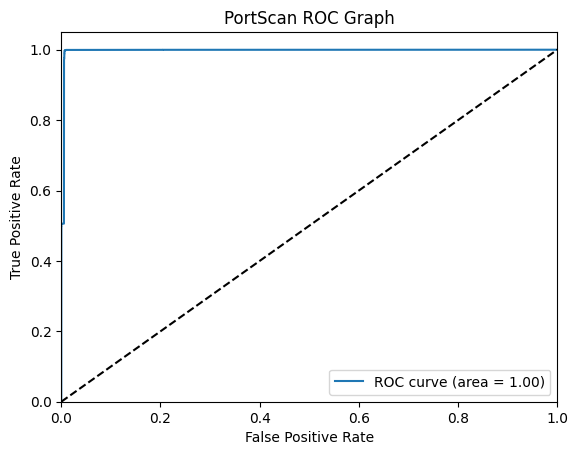

In [ ]:
plot_roc('PortScan',pred,y_test)

In [ ]:
target_names = ['BENIGN', 'PortScan']
report = classification_report(y_test, pred2, target_names=target_names)

print("Model 5: Binary Classification (PortScan)\n")
print(report)

Model 5: Binary Classification (PortScan)

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00     25377
    PortScan       0.99      1.00      1.00     25632

    accuracy                           1.00     51009
   macro avg       1.00      1.00      1.00     51009
weighted avg       1.00      1.00      1.00     51009



In [ ]:
#Prepare data for PortScan Autoencoder Model
benign_data = df2[df2[' Label'] == 0]
attack_data = df2[df2[' Label'] == 1]

# Split BENIGN data into training and test sets
train_benign, test_benign = train_test_split(benign_data, test_size=0.1, random_state=42)

# Use all attack instances in the test set
unused_attack, test_attack = train_test_split(attack_data, test_size=0.01, random_state=42)
test_data = pd.concat([test_benign, test_attack])

# Shuffle the training and test datasets
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True) # test_data = BENIGN mixed  with web attacks
normal_traffic_data = train_benign.sample(frac=1, random_state=42).reset_index(drop=True) # normal_traffic_data = JUST BENIGN

x_columns = normal_traffic_data.columns.drop(' Label')
x_train = normal_traffic_data[x_columns].values
# y_train = normal_traffic_data[' Label'].values

x_test = test_data[x_columns].values
y_test = test_data[' Label'].values

input_shape = x_train.shape[1]

In [ ]:
#PortScan Autoencoder Model

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

pipeline.fit(x_train)
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)
input_dim = x_train_transformed.shape[1]

BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(2, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = autoencoder.fit(
    x_train_transformed, x_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[monitor],
    validation_data=(x_test_transformed, x_test_transformed))

Epoch 1/100
449/449 [==============================] - 10s 7ms/step - loss: 0.0015 - acc: 0.9826 - val_loss: 8.5460e-04 - val_acc: 0.9867
Epoch 2/100
449/449 [==============================] - 3s 7ms/step - loss: 8.3091e-04 - acc: 0.9880 - val_loss: 7.3071e-04 - val_acc: 0.9863
Epoch 3/100
449/449 [==============================] - 4s 8ms/step - loss: 6.9984e-04 - acc: 0.9875 - val_loss: 5.6018e-04 - val_acc: 0.9858
Epoch 4/100
449/449 [==============================] - 4s 8ms/step - loss: 4.5909e-04 - acc: 0.9874 - val_loss: 3.6325e-04 - val_acc: 0.9858
Epoch 5/100
449/449 [==============================] - 3s 7ms/step - loss: 3.8316e-04 - acc: 0.9878 - val_loss: 3.3335e-04 - val_acc: 0.9884
Epoch 6/100
449/449 [==============================] - 3s 7ms/step - loss: 3.5845e-04 - acc: 0.9877 - val_loss: 3.1788e-04 - val_acc: 0.9881
Epoch 7/100
449/449 [==============================] - 3s 7ms/step - loss: 3.3409e-04 - acc: 0.9880 - val_loss: 3.0035e-04 - val_acc: 0.9895
Epoch 8/100
449/

449/449 [==============================] - 1s 2ms/step
AUC-ROC: 0.35806294437071656
True Negatives: 12668, False Positives: 85, False Negatives: 1569, True Positives: 21


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


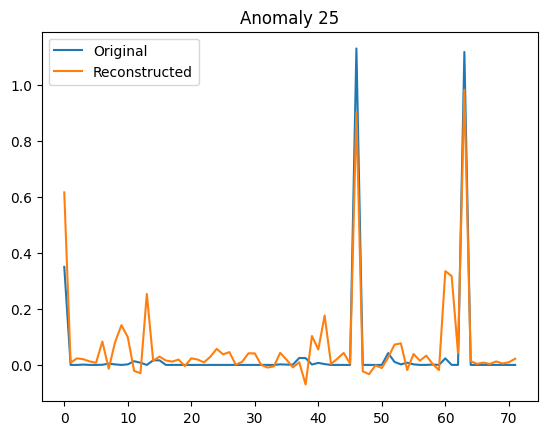

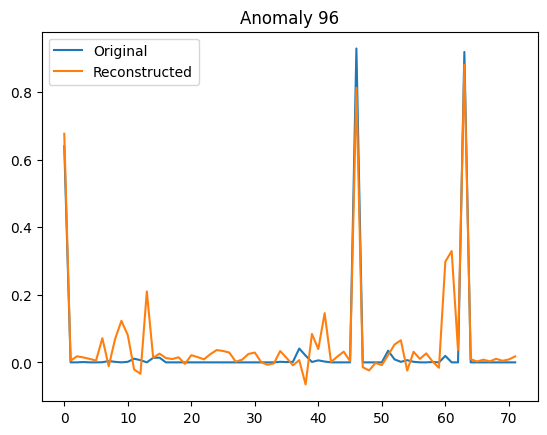

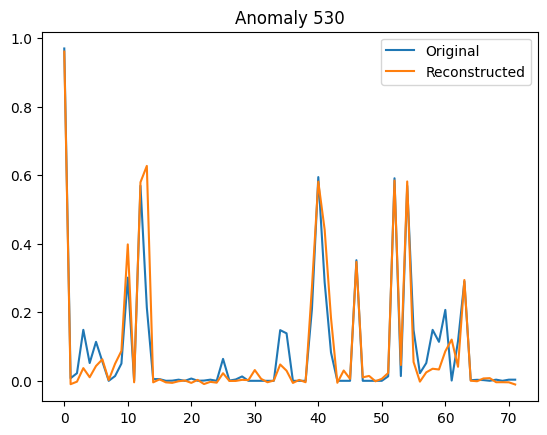

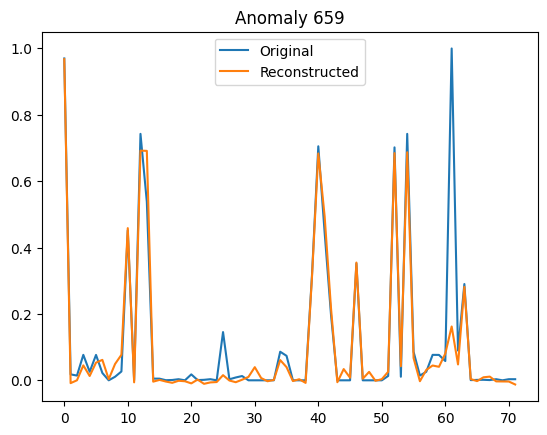

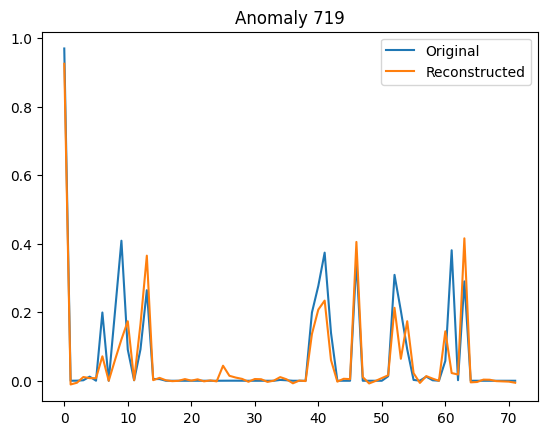

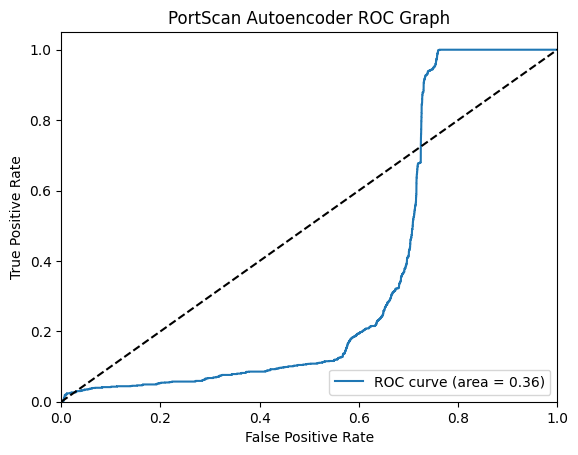

In [ ]:
reconstructed_data = autoencoder.predict(x_test_transformed)
mse = np.mean(np.square(x_test_transformed - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)  # Example threshold

# Identify anomalies based on threshold
anomalies = mse > threshold

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, mse)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, anomalies).ravel()

# Calculate precision, recall, and F1-score using a threshold
# Choose threshold based on precision-recall curve or custom value
custom_threshold = 0.5  # Example threshold
anomalies_custom = mse > custom_threshold
precision_custom = precision_score(y_test, anomalies_custom)
recall_custom = recall_score(y_test, anomalies_custom)
f1_custom = f1_score(y_test, anomalies_custom)

# Print AUC-ROC
print(f"AUC-ROC: {auc_roc}")
# Print Confusion Matrix
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Visualize reconstructed vs. original data for anomalies
anomaly_indices = np.where(anomalies)[0][:5]  # Choose first 5 anomalies for visualization
for idx in anomaly_indices:
    plt.figure()
    plt.title(f"Anomaly {idx}")
    plt.plot(x_test_transformed[idx], label='Original')
    plt.plot(reconstructed_data[idx], label='Reconstructed')
    plt.legend()
    plt.show()

plot_roc('PortScan Autoencoder',mse,y_test)

In [ ]:
# Include equal amount of attack and benign for binary model
new_dfs = []
new_dfs.append(df3[df3[' Label'] != 0].sample(n=13835, random_state=42))
new_dfs.append(df3[df3[' Label'] == 0].sample(n=13835, random_state=42))

df_3 = pd.concat(new_dfs)
df_3 = df_3.sample(frac=1, random_state=42).reset_index(drop=True)
Counter(df_3[' Label'])

Counter({0: 13835, 1: 13835})

In [ ]:
# Binary for Brute Force

x_columns = df_3.columns.drop(' Label')
x = df_3[x_columns].values
y = df_3[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

bin_model3 = Sequential()
bin_model3.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
bin_model3.add(Dense(1,activation='sigmoid'))
bin_model3.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto', restore_best_weights=True)
bin_model3.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Epoch 1/100
692/692 [==============================] - 4s 4ms/step - loss: 0.0449 - accuracy: 0.9901 - val_loss: 0.0163 - val_accuracy: 0.9964
Epoch 2/100
692/692 [==============================] - 3s 4ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.0146 - val_accuracy: 0.9971
Epoch 3/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0152 - accuracy: 0.9967 - val_loss: 0.0137 - val_accuracy: 0.9975
Epoch 4/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0147 - accuracy: 0.9972 - val_loss: 0.0132 - val_accuracy: 0.9975
Epoch 5/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9976 - val_loss: 0.0144 - val_accuracy: 0.9975
Epoch 6/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.9976 - val_loss: 0.0129 - val_accuracy: 0.9977
Epoch 7/100
692/692 [==============================] - 3s 4ms/step - loss: 0.0139 - accuracy: 0.9977 - val_loss: 0.0141 - val_accuracy: 0.9977

In [ ]:
# Compute accuracy score
pred = bin_model3.predict(x_test)
threshold = 0.45
correct = 0
pred2 = []

for p in pred:
  if p > threshold:
    pred2.append(1)
  else:
    pred2.append(0)

for predicted_label, true_label in zip(pred2, y_test):
    if predicted_label == true_label:
        correct += 1

print(f"Accuracy: {correct/len(y_test)}")
score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

173/173 [==============================] - 0s 1ms/step
Accuracy: 0.9974701843151428
Log loss score: 0.013168171631674663


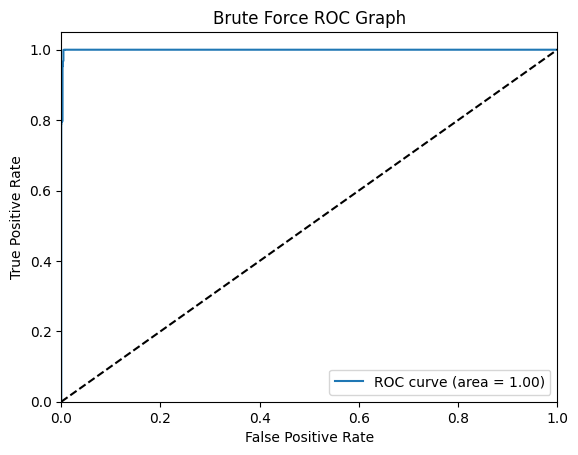

In [ ]:
plot_roc('Brute Force',pred,y_test)

In [ ]:
target_names = ['BENIGN', 'Brute Force']
report = classification_report(y_test, pred2, target_names=target_names)

print("Model 6: Binary Classification (Brute Force)\n")
print(report)

Model 6: Binary Classification (Brute Force)

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      2759
 Brute Force       1.00      1.00      1.00      2775

    accuracy                           1.00      5534
   macro avg       1.00      1.00      1.00      5534
weighted avg       1.00      1.00      1.00      5534



In [ ]:
#Prepare data for Brute Force Autoencoder Model
benign_data = df3[df3[' Label'] == 0]
attack_data = df3[df3[' Label'] == 1]

# Split BENIGN data into training and test sets
train_benign, test_benign = train_test_split(benign_data, test_size=0.1, random_state=42)

# Use all attack instances in the test set
test_data = pd.concat([test_benign, attack_data])

# Shuffle the training and test datasets
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True) # test_data = BENIGN mixed  with web attacks
normal_traffic_data = train_benign.sample(frac=1, random_state=42).reset_index(drop=True) # normal_traffic_data = JUST BENIGN

x_columns = normal_traffic_data.columns.drop(' Label')
x_train = normal_traffic_data[x_columns].values
# y_train = normal_traffic_data[' Label'].values

x_test = test_data[x_columns].values
y_test = test_data[' Label'].values

input_shape = x_train.shape[1]

In [ ]:
#Brute Force Autoencoder Model

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

pipeline.fit(x_train)
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)
input_dim = x_train_transformed.shape[1]

BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(2, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = autoencoder.fit(
    x_train_transformed, x_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[monitor],
    validation_data=(x_test_transformed, x_test_transformed))

Epoch 1/100
1519/1519 [==============================] - 14s 6ms/step - loss: 0.0021 - acc: 0.9568 - val_loss: 0.0047 - val_acc: 0.7342
Epoch 2/100
1519/1519 [==============================] - 7s 5ms/step - loss: 7.9679e-04 - acc: 0.9734 - val_loss: 0.0043 - val_acc: 0.9869
Epoch 3/100
1519/1519 [==============================] - 8s 6ms/step - loss: 7.5728e-04 - acc: 0.9832 - val_loss: 0.0041 - val_acc: 0.9845
Epoch 4/100
1519/1519 [==============================] - 7s 5ms/step - loss: 6.3390e-04 - acc: 0.9640 - val_loss: 0.0034 - val_acc: 0.8532
Epoch 5/100
1519/1519 [==============================] - 8s 5ms/step - loss: 4.7292e-04 - acc: 0.9690 - val_loss: 0.0030 - val_acc: 0.8599
Epoch 6/100
1519/1519 [==============================] - 7s 5ms/step - loss: 4.1948e-04 - acc: 0.9735 - val_loss: 0.0029 - val_acc: 0.8581
Epoch 7/100
1519/1519 [==============================] - 7s 5ms/step - loss: 3.6189e-04 - acc: 0.9734 - val_loss: 0.0026 - val_acc: 0.9822
Epoch 8/100
1519/1519 [=======

1782/1782 [==============================] - 3s 2ms/step
AUC-ROC: 0.9873398137370945
True Negatives: 43184, False Positives: 4, False Negatives: 13832, True Positives: 3


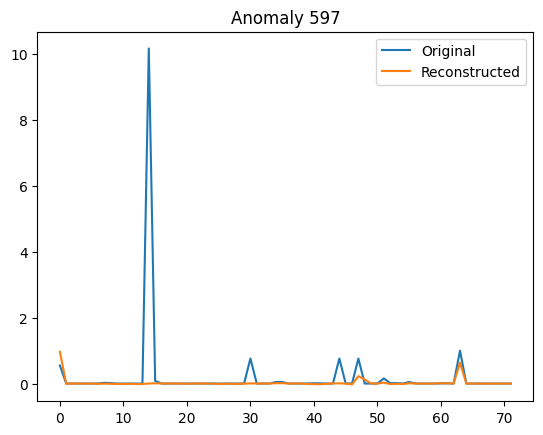

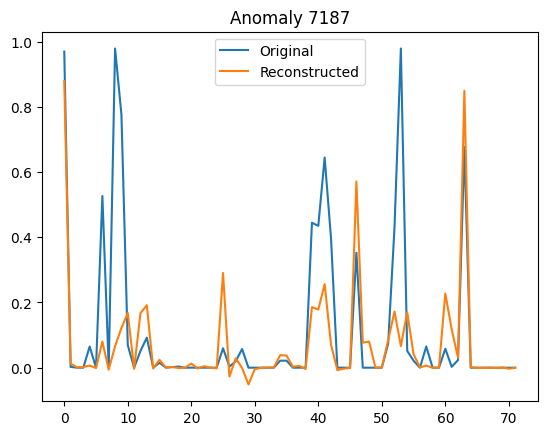

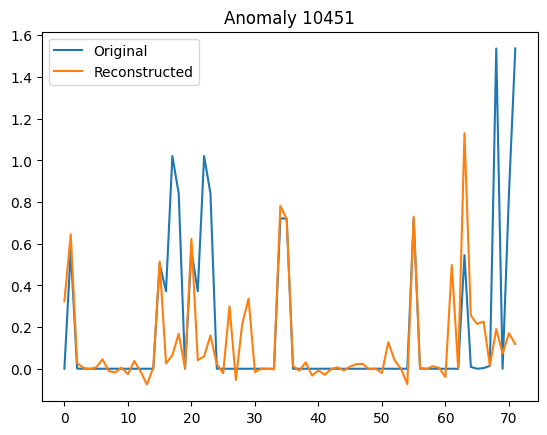

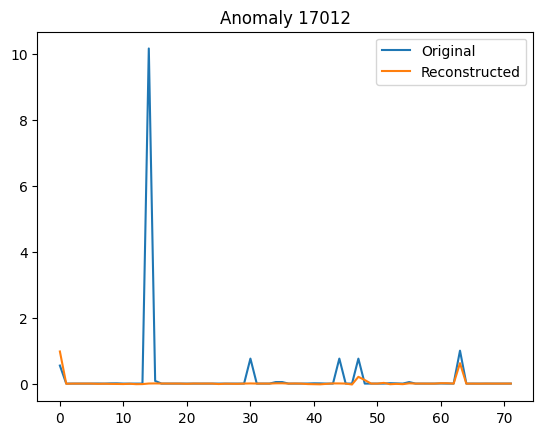

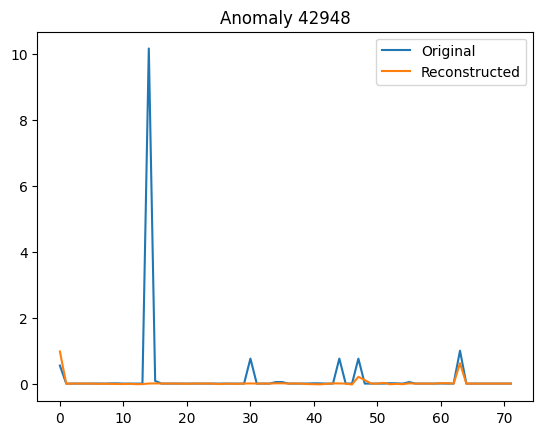

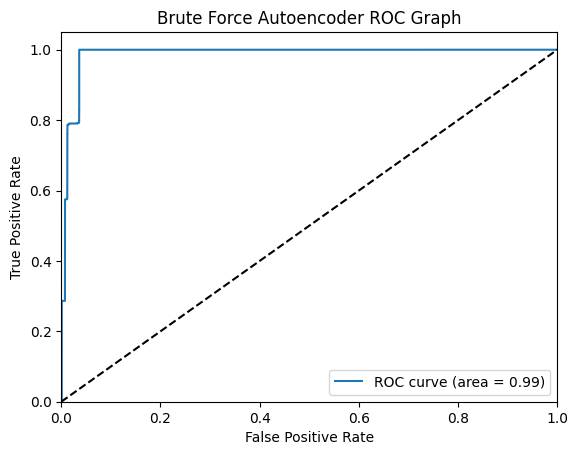

In [ ]:
reconstructed_data = autoencoder.predict(x_test_transformed)
mse = np.mean(np.square(x_test_transformed - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)  # Example threshold

# Identify anomalies based on threshold
anomalies = mse > threshold

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, mse)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, anomalies).ravel()

# Calculate precision, recall, and F1-score using a threshold
# Choose threshold based on precision-recall curve or custom value
custom_threshold = 0.5  # Example threshold
anomalies_custom = mse > custom_threshold
precision_custom = precision_score(y_test, anomalies_custom)
recall_custom = recall_score(y_test, anomalies_custom)
f1_custom = f1_score(y_test, anomalies_custom)

# Print AUC-ROC
print(f"AUC-ROC: {auc_roc}")
# Print Confusion Matrix
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Visualize reconstructed vs. original data for anomalies
anomaly_indices = np.where(anomalies)[0][:5]  # Choose first 5 anomalies for visualization
for idx in anomaly_indices:
    plt.figure()
    plt.title(f"Anomaly {idx}")
    plt.plot(x_test_transformed[idx], label='Original')
    plt.plot(reconstructed_data[idx], label='Reconstructed')
    plt.legend()
    plt.show()

plot_roc('Brute Force Autoencoder',mse,y_test)

In [ ]:
# Include equal amount of attack and benign for binary model
new_dfs = []
new_dfs.append(df4[df4[' Label'] != 0].sample(n=251723, random_state=42))
new_dfs.append(df4[df4[' Label'] == 0].sample(n=251723, random_state=42))

df_4 = pd.concat(new_dfs)
df_4 = df_4.sample(frac=1, random_state=42).reset_index(drop=True)
Counter(df_4[' Label'])

Counter({0: 251723, 1: 251723})

In [ ]:
# Binary for Dos Attack

x_columns = df_4.columns.drop(' Label')
x = df_4[x_columns].values
y = df_4[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

bin_model4 = Sequential()
bin_model4.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
bin_model4.add(Dense(1,activation='sigmoid'))
bin_model4.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto', restore_best_weights=True)
bin_model4.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=50)

Epoch 1/50
12587/12587 [==============================] - 46s 4ms/step - loss: 0.0596 - accuracy: 0.9798 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 2/50
12587/12587 [==============================] - 46s 4ms/step - loss: 0.0267 - accuracy: 0.9910 - val_loss: 0.0275 - val_accuracy: 0.9919
Epoch 3/50
12587/12587 [==============================] - 46s 4ms/step - loss: 0.0244 - accuracy: 0.9912 - val_loss: 0.0222 - val_accuracy: 0.9917
Epoch 4/50
12587/12587 [==============================] - 47s 4ms/step - loss: 0.0233 - accuracy: 0.9914 - val_loss: 0.0208 - val_accuracy: 0.9920
Epoch 5/50
12587/12587 [==============================] - 45s 4ms/step - loss: 0.0225 - accuracy: 0.9916 - val_loss: 0.0251 - val_accuracy: 0.9906
Epoch 6/50
12587/12587 [==============================] - 44s 4ms/step - loss: 0.0218 - accuracy: 0.9920 - val_loss: 0.0203 - val_accuracy: 0.9930
Epoch 7/50
12587/12587 [==============================] - 44s 4ms/step - loss: 0.0215 - accuracy: 0.9919 - val_loss: 0

In [ ]:
# Compute accuracy score
pred = bin_model4.predict(x_test)
threshold = 0.45
correct = 0
pred2 = []

for p in pred:
  if p > threshold:
    pred2.append(1)
  else:
    pred2.append(0)

for predicted_label, true_label in zip(pred2, y_test):
    if predicted_label == true_label:
        correct += 1

print(f"Accuracy: {correct/len(y_test)}")
score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

3147/3147 [==============================] - 4s 1ms/step
Accuracy: 0.9956400834243718
Log loss score: 0.019292935683040986


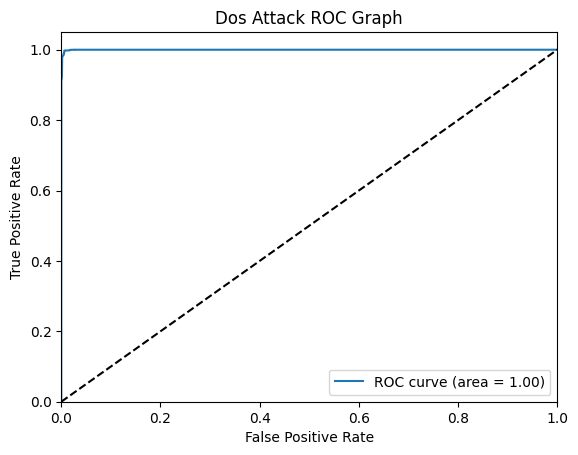

In [ ]:
plot_roc('Dos Attack',pred,y_test)

In [ ]:
target_names = ['BENIGN', 'Dos Attack']
report = classification_report(y_test, pred2, target_names=target_names)

print("Model 7: Binary Classification (Dos Attack)\n")
print(report)

Model 7: Binary Classification (Dos Attack)

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00     50519
  Dos Attack       0.99      1.00      1.00     50171

    accuracy                           1.00    100690
   macro avg       1.00      1.00      1.00    100690
weighted avg       1.00      1.00      1.00    100690



In [ ]:
#Prepare data for Dos Attack Autoencoder Model
benign_data = df4[df4[' Label'] == 0]
attack_data = df4[df4[' Label'] == 1]

# Split BENIGN data into training and test sets
train_benign, test_benign = train_test_split(benign_data, test_size=0.1, random_state=42)

# Use all attack instances in the test set
test_data = pd.concat([test_benign, attack_data])

# Shuffle the training and test datasets
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True) # test_data = BENIGN mixed  with web attacks
normal_traffic_data = train_benign.sample(frac=1, random_state=42).reset_index(drop=True) # normal_traffic_data = JUST BENIGN

x_columns = normal_traffic_data.columns.drop(' Label')
x_train = normal_traffic_data[x_columns].values
# y_train = normal_traffic_data[' Label'].values

x_test = test_data[x_columns].values
y_test = test_data[' Label'].values

input_shape = x_train.shape[1]

In [ ]:
#Dos Attack Autoencoder Model

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

pipeline.fit(x_train)
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)
input_dim = x_train_transformed.shape[1]

BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(2, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = autoencoder.fit(
    x_train_transformed, x_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[monitor],
    validation_data=(x_test_transformed, x_test_transformed))

Epoch 1/100
1547/1547 [==============================] - 13s 7ms/step - loss: 0.0015 - acc: 0.9857 - val_loss: 0.0182 - val_acc: 0.5324
Epoch 2/100
1547/1547 [==============================] - 12s 8ms/step - loss: 6.0088e-04 - acc: 0.9899 - val_loss: 0.0198 - val_acc: 0.5304
Epoch 3/100
1547/1547 [==============================] - 9s 6ms/step - loss: 5.5914e-04 - acc: 0.9907 - val_loss: 0.0196 - val_acc: 0.5328
Epoch 4/100
1547/1547 [==============================] - 10s 6ms/step - loss: 4.3301e-04 - acc: 0.9910 - val_loss: 0.0129 - val_acc: 0.5326
Epoch 5/100
1547/1547 [==============================] - 12s 8ms/step - loss: 3.8004e-04 - acc: 0.9908 - val_loss: 0.0132 - val_acc: 0.5327
Epoch 6/100
1547/1547 [==============================] - 12s 8ms/step - loss: 3.6086e-04 - acc: 0.9909 - val_loss: 0.0127 - val_acc: 0.5327
Epoch 7/100
1547/1547 [==============================] - 9s 6ms/step - loss: 3.4410e-04 - acc: 0.9911 - val_loss: 0.0126 - val_acc: 0.5327
Epoch 8/100
1547/1547 [===

9242/9242 [==============================] - 17s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC-ROC: 0.9841348060739546
True Negatives: 43993, False Positives: 5, False Negatives: 246301, True Positives: 5422


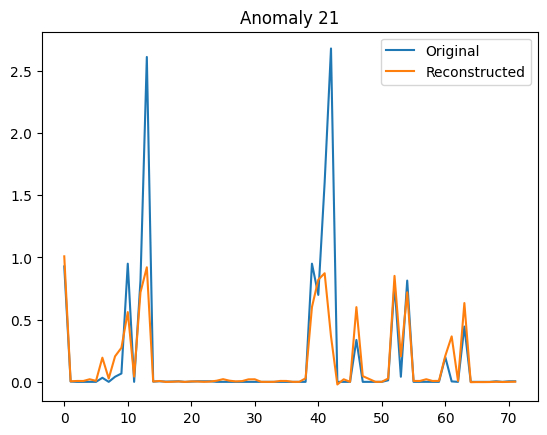

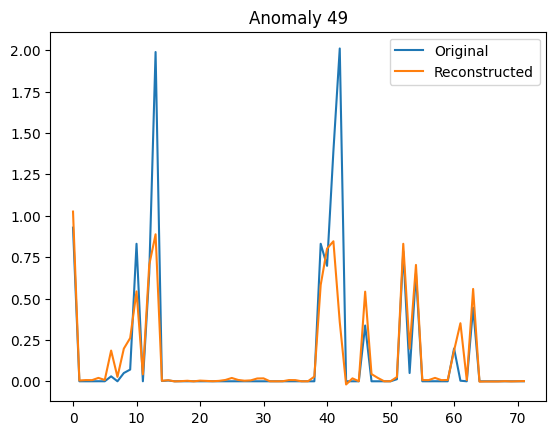

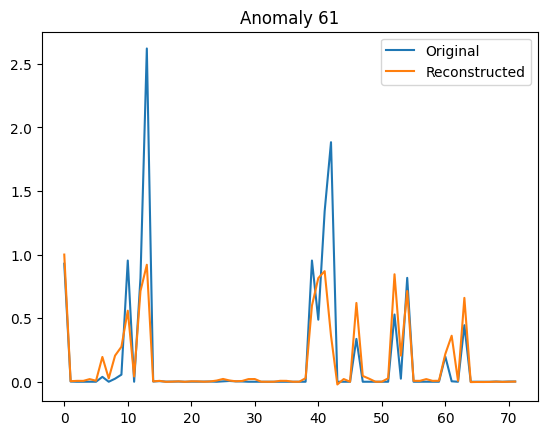

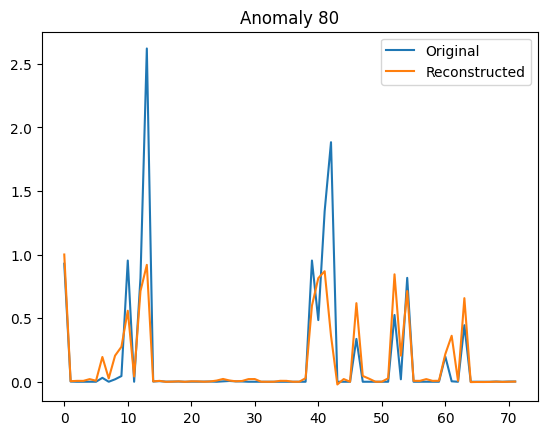

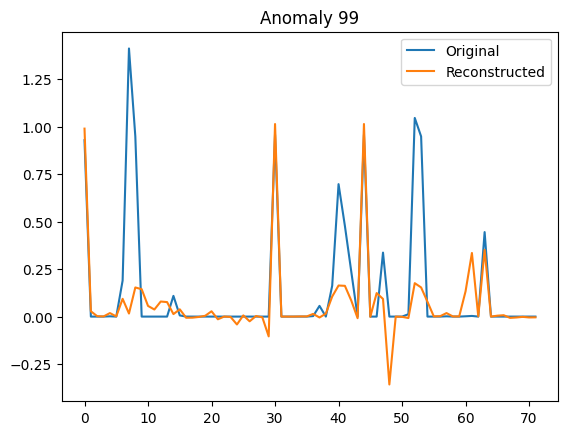

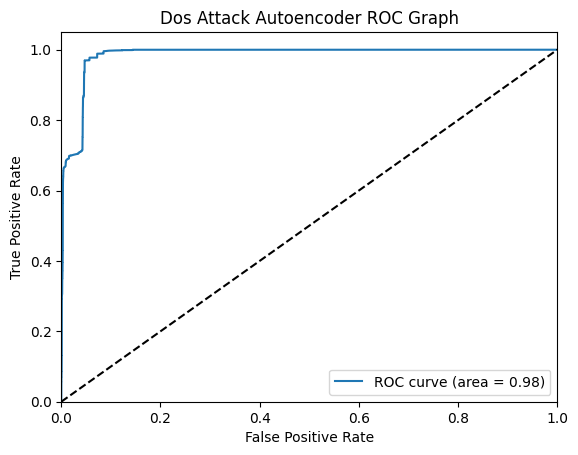

In [ ]:
reconstructed_data = autoencoder.predict(x_test_transformed)
mse = np.mean(np.square(x_test_transformed - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)  # Example threshold

# Identify anomalies based on threshold
anomalies = mse > threshold

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, mse)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, anomalies).ravel()

# Calculate precision, recall, and F1-score using a threshold
# Choose threshold based on precision-recall curve or custom value
custom_threshold = 0.5  # Example threshold
anomalies_custom = mse > custom_threshold
precision_custom = precision_score(y_test, anomalies_custom)
recall_custom = recall_score(y_test, anomalies_custom)
f1_custom = f1_score(y_test, anomalies_custom)

# Print AUC-ROC
print(f"AUC-ROC: {auc_roc}")
# Print Confusion Matrix
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Visualize reconstructed vs. original data for anomalies
anomaly_indices = np.where(anomalies)[0][:5]  # Choose first 5 anomalies for visualization
for idx in anomaly_indices:
    plt.figure()
    plt.title(f"Anomaly {idx}")
    plt.plot(x_test_transformed[idx], label='Original')
    plt.plot(reconstructed_data[idx], label='Reconstructed')
    plt.legend()
    plt.show()

plot_roc('Dos Attack Autoencoder',mse,y_test)

In [ ]:
# Include equal amount of attack and benign for binary model
new_dfs = []
new_dfs.append(df5[df5[' Label'] != 0].sample(n=97714, random_state=42))
new_dfs.append(df5[df5[' Label'] == 0].sample(n=97714, random_state=42))

df_5 = pd.concat(new_dfs)
df_5 = df_5.sample(frac=1, random_state=42).reset_index(drop=True)
Counter(df_5[' Label'])

Counter({0: 97714, 1: 97714})

In [ ]:
# Binary for DDoS Attack

x_columns = df_5.columns.drop(' Label')
x = df_5[x_columns].values
y = df_5[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

bin_model5 = Sequential()
bin_model5.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
bin_model5.add(Dense(1,activation='sigmoid'))
bin_model5.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto', restore_best_weights=True)
bin_model5.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=50)

Epoch 1/50
4886/4886 [==============================] - 18s 4ms/step - loss: 2.7503 - accuracy: 0.9547 - val_loss: 0.0261 - val_accuracy: 0.9938
Epoch 2/50
4886/4886 [==============================] - 18s 4ms/step - loss: 0.0486 - accuracy: 0.9930 - val_loss: 0.0203 - val_accuracy: 0.9943
Epoch 3/50
4886/4886 [==============================] - 20s 4ms/step - loss: 0.0614 - accuracy: 0.9938 - val_loss: 0.0196 - val_accuracy: 0.9943
Epoch 4/50
4886/4886 [==============================] - 17s 4ms/step - loss: 0.0518 - accuracy: 0.9939 - val_loss: 0.0177 - val_accuracy: 0.9945
Epoch 5/50
4886/4886 [==============================] - 19s 4ms/step - loss: 0.0521 - accuracy: 0.9939 - val_loss: 0.0169 - val_accuracy: 0.9946
Epoch 6/50
4886/4886 [==============================] - 33s 7ms/step - loss: 0.0464 - accuracy: 0.9942 - val_loss: 0.0161 - val_accuracy: 0.9947
Epoch 7/50
4886/4886 [==============================] - 18s 4ms/step - loss: 0.0498 - accuracy: 0.9942 - val_loss: 0.0167 - val_ac

In [ ]:
# Compute accuracy score
pred = bin_model5.predict(x_test)
threshold = 0.45
correct = 0
pred2 = []

for p in pred:
  if p > threshold:
    pred2.append(1)
  else:
    pred2.append(0)

for predicted_label, true_label in zip(pred2, y_test):
    if predicted_label == true_label:
        correct += 1

print(f"Accuracy: {correct/len(y_test)}")
score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

1222/1222 [==============================] - 2s 1ms/step
Accuracy: 0.9951133398147675
Log loss score: 0.009503341124392804


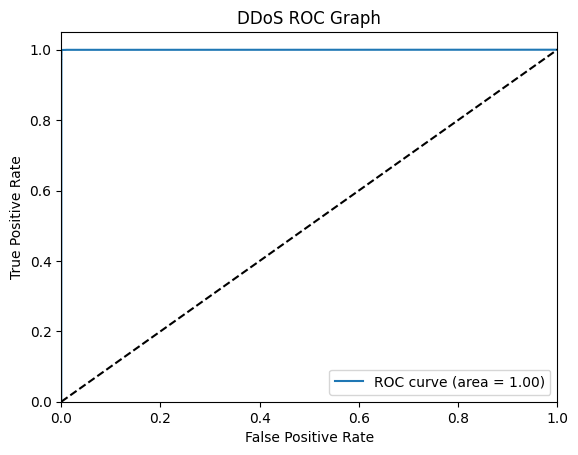

In [ ]:
plot_roc('DDoS',pred,y_test)

In [ ]:
target_names = ['BENIGN', 'DDoS']
report = classification_report(y_test, pred2, target_names=target_names)

print("Model 8: Binary Classification (DDoS)\n")
print(report)

Model 8: Binary Classification (DDoS)

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00     19575
        DDoS       0.99      1.00      1.00     19511

    accuracy                           1.00     39086
   macro avg       1.00      1.00      1.00     39086
weighted avg       1.00      1.00      1.00     39086



In [ ]:
#Prepare data for DDoS Autoencoder Model
benign_data = df5[df5[' Label'] == 0]
attack_data = df5[df5[' Label'] == 1]

# Split BENIGN data into training and test sets
train_benign, test_benign = train_test_split(benign_data, test_size=0.1, random_state=42)

# Use all attack instances in the test set
test_data = pd.concat([test_benign, attack_data])

# Shuffle the training and test datasets
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True) # test_data = BENIGN mixed  with web attacks
normal_traffic_data = train_benign.sample(frac=1, random_state=42).reset_index(drop=True) # normal_traffic_data = JUST BENIGN

x_columns = normal_traffic_data.columns.drop(' Label')
x_train = normal_traffic_data[x_columns].values
# y_train = normal_traffic_data[' Label'].values

x_test = test_data[x_columns].values
y_test = test_data[' Label'].values

input_shape = x_train.shape[1]

In [ ]:
#DDoS Autoencoder Model

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

pipeline.fit(x_train)
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)
input_dim = x_train_transformed.shape[1]

BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(2, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = autoencoder.fit(
    x_train_transformed, x_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[monitor],
    validation_data=(x_test_transformed, x_test_transformed))

Epoch 1/100
344/344 [==============================] - 6s 11ms/step - loss: 0.0041 - acc: 0.9585 - val_loss: 0.1021 - val_acc: 0.4782
Epoch 2/100
344/344 [==============================] - 3s 9ms/step - loss: 0.0018 - acc: 0.9917 - val_loss: 0.0974 - val_acc: 0.4782
Epoch 3/100
344/344 [==============================] - 2s 7ms/step - loss: 0.0011 - acc: 0.9930 - val_loss: 0.0981 - val_acc: 0.4784
Epoch 4/100
344/344 [==============================] - 3s 8ms/step - loss: 0.0011 - acc: 0.9937 - val_loss: 0.0972 - val_acc: 0.4784
Epoch 5/100
344/344 [==============================] - 3s 8ms/step - loss: 0.0011 - acc: 0.9937 - val_loss: 0.0968 - val_acc: 0.4784
Epoch 6/100
344/344 [==============================] - 3s 10ms/step - loss: 9.8330e-04 - acc: 0.9933 - val_loss: 0.0675 - val_acc: 0.4783
Epoch 7/100
344/344 [==============================] - 3s 8ms/step - loss: 7.7228e-04 - acc: 0.9931 - val_loss: 0.0497 - val_acc: 0.4783
Epoch 8/100
344/344 [==============================] - 3s 8

4307/4307 [==============================] - 8s 2ms/step
AUC-ROC: 0.9702889690228276
True Negatives: 9772, False Positives: 0, False Negatives: 121725, True Positives: 6302


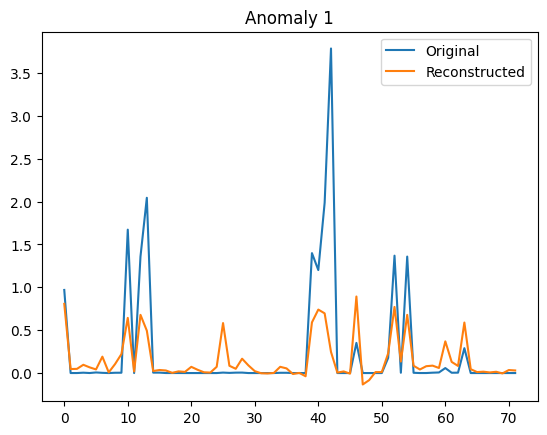

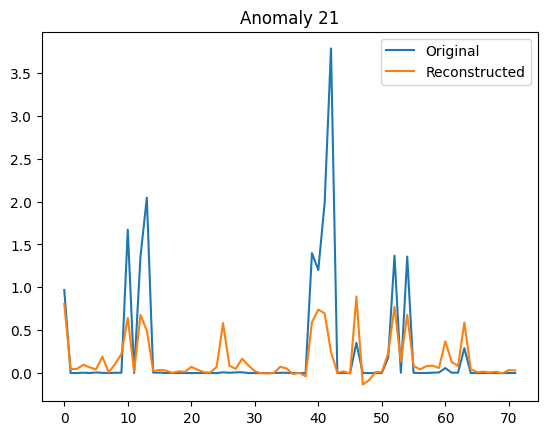

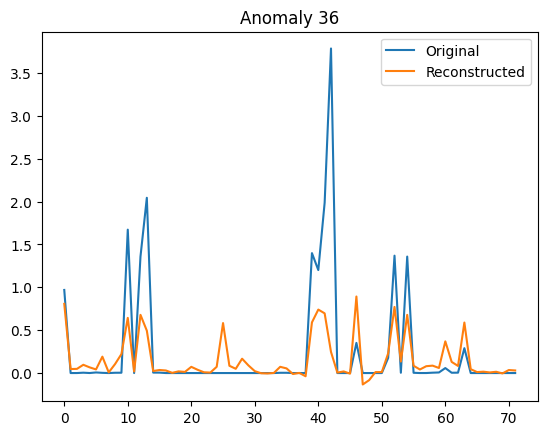

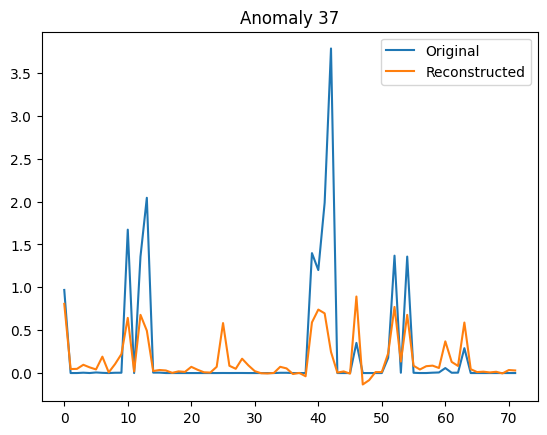

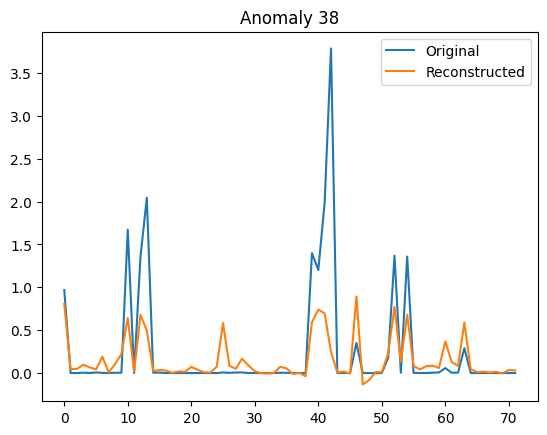

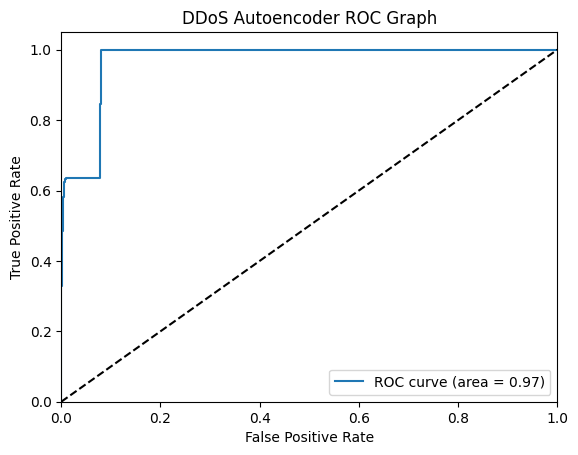

In [ ]:
reconstructed_data = autoencoder.predict(x_test_transformed)
mse = np.mean(np.square(x_test_transformed - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)  # Example threshold

# Identify anomalies based on threshold
anomalies = mse > threshold

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, mse)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, anomalies).ravel()

# Calculate precision, recall, and F1-score using a threshold
# Choose threshold based on precision-recall curve or custom value
custom_threshold = 0.5  # Example threshold
anomalies_custom = mse > custom_threshold
precision_custom = precision_score(y_test, anomalies_custom)
recall_custom = recall_score(y_test, anomalies_custom)
f1_custom = f1_score(y_test, anomalies_custom)

# Print AUC-ROC
print(f"AUC-ROC: {auc_roc}")
# Print Confusion Matrix
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Visualize reconstructed vs. original data for anomalies
anomaly_indices = np.where(anomalies)[0][:5]  # Choose first 5 anomalies for visualization
for idx in anomaly_indices:
    plt.figure()
    plt.title(f"Anomaly {idx}")
    plt.plot(x_test_transformed[idx], label='Original')
    plt.plot(reconstructed_data[idx], label='Reconstructed')
    plt.legend()
    plt.show()

plot_roc('DDoS Autoencoder',mse,y_test)

In [ ]:
# Include equal amount of attack and benign for binary model
new_dfs = []
new_dfs.append(df6[df6[' Label'] != 0].sample(n=1966, random_state=42))
new_dfs.append(df6[df6[' Label'] == 0].sample(n=1966, random_state=42))

df_6 = pd.concat(new_dfs)
df_6 = df_6.sample(frac=1, random_state=42).reset_index(drop=True)
Counter(df_6[' Label'])

Counter({1: 1966, 0: 1966})

In [ ]:
# Binary for Bot

x_columns = df_6.columns.drop(' Label')
x = df_6[x_columns].values
y = df_6[' Label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

bin_model6 = Sequential()
bin_model6.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
bin_model6.add(Dense(1,activation='sigmoid'))
bin_model6.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto', restore_best_weights=True)
bin_model6.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=50)

Epoch 1/50
99/99 [==============================] - 2s 7ms/step - loss: 5.2791 - accuracy: 0.7215 - val_loss: 2.2319 - val_accuracy: 0.5095
Epoch 2/50
99/99 [==============================] - 0s 5ms/step - loss: 1.6977 - accuracy: 0.7644 - val_loss: 2.7418 - val_accuracy: 0.8933
Epoch 3/50
99/99 [==============================] - 0s 5ms/step - loss: 1.7622 - accuracy: 0.7631 - val_loss: 1.2931 - val_accuracy: 0.8895
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - loss: 2.2593 - accuracy: 0.7548 - val_loss: 3.0747 - val_accuracy: 0.8933
Epoch 5/50
99/99 [==============================] - 0s 4ms/step - loss: 2.3561 - accuracy: 0.7631 - val_loss: 0.9037 - val_accuracy: 0.5095
Epoch 6/50
99/99 [==============================] - 0s 4ms/step - loss: 2.5315 - accuracy: 0.7695 - val_loss: 1.7203 - val_accuracy: 0.5070
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 2.0881 - accuracy: 0.7606 - val_loss: 4.0319 - val_accuracy: 0.8869
Epoch 8/50
99/99 [==

In [ ]:
# Compute accuracy score
pred = bin_model6.predict(x_test)
threshold = 0.45
correct = 0
pred2 = []

for p in pred:
  if p > threshold:
    pred2.append(1)
  else:
    pred2.append(0)

for predicted_label, true_label in zip(pred2, y_test):
    if predicted_label == true_label:
        correct += 1

print(f"Accuracy: {correct/len(y_test)}")
score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

25/25 [==============================] - 0s 1ms/step
Accuracy: 0.8919949174078781
Log loss score: 0.43699649671368906


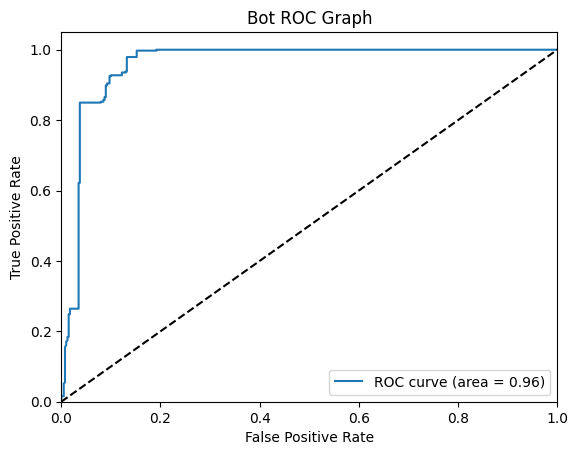

In [ ]:
plot_roc('Bot',pred,y_test)

In [ ]:
target_names = ['BENIGN', 'Bot']
report = classification_report(y_test, pred2, target_names=target_names)

print("Model 9: Binary Classification (Bot)\n")
print(report)

Model 9: Binary Classification (Bot)

              precision    recall  f1-score   support

      BENIGN       0.87      0.93      0.90       401
         Bot       0.92      0.85      0.89       386

    accuracy                           0.89       787
   macro avg       0.89      0.89      0.89       787
weighted avg       0.89      0.89      0.89       787



In [ ]:
#Prepare data for Bot Autoencoder Model
benign_data = df6[df6[' Label'] == 0]
attack_data = df6[df6[' Label'] == 1]

# Split BENIGN data into training and test sets
train_benign, test_benign = train_test_split(benign_data, test_size=0.1, random_state=42)

# Use all attack instances in the test set
test_data = pd.concat([test_benign, attack_data])

# Shuffle the training and test datasets
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True) # test_data = BENIGN mixed  with web attacks
normal_traffic_data = train_benign.sample(frac=1, random_state=42).reset_index(drop=True) # normal_traffic_data = JUST BENIGN

x_columns = normal_traffic_data.columns.drop(' Label')
x_train = normal_traffic_data[x_columns].values
# y_train = normal_traffic_data[' Label'].values

x_test = test_data[x_columns].values
y_test = test_data[' Label'].values

input_shape = x_train.shape[1]

In [ ]:
#Bot Autoencoder Model

pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

pipeline.fit(x_train)
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)
input_dim = x_train_transformed.shape[1]

BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(2, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="Adam",
                    loss="mse",
                    metrics=["acc"])

monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = autoencoder.fit(
    x_train_transformed, x_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[monitor],
    validation_data=(x_test_transformed, x_test_transformed))

Epoch 1/100
665/665 [==============================] - 15s 12ms/step - loss: 0.0015 - acc: 0.9863 - val_loss: 7.9479e-04 - val_acc: 0.9918
Epoch 2/100
665/665 [==============================] - 7s 11ms/step - loss: 8.9718e-04 - acc: 0.9888 - val_loss: 6.1728e-04 - val_acc: 0.9918
Epoch 3/100
665/665 [==============================] - 8s 12ms/step - loss: 7.2121e-04 - acc: 0.9882 - val_loss: 5.5523e-04 - val_acc: 0.9882
Epoch 4/100
665/665 [==============================] - 7s 11ms/step - loss: 6.2766e-04 - acc: 0.9887 - val_loss: 4.5409e-04 - val_acc: 0.9917
Epoch 5/100
665/665 [==============================] - 8s 12ms/step - loss: 5.5068e-04 - acc: 0.9890 - val_loss: 3.8179e-04 - val_acc: 0.9920
Epoch 6/100
665/665 [==============================] - 8s 12ms/step - loss: 4.5604e-04 - acc: 0.9887 - val_loss: 3.0496e-04 - val_acc: 0.9945
Epoch 7/100
665/665 [==============================] - 7s 11ms/step - loss: 4.0628e-04 - acc: 0.9898 - val_loss: 2.8386e-04 - val_acc: 0.9941
Epoch 8/1

653/653 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC-ROC: 0.2973294633397465
True Negatives: 18698, False Positives: 206, False Negatives: 1966, True Positives: 0


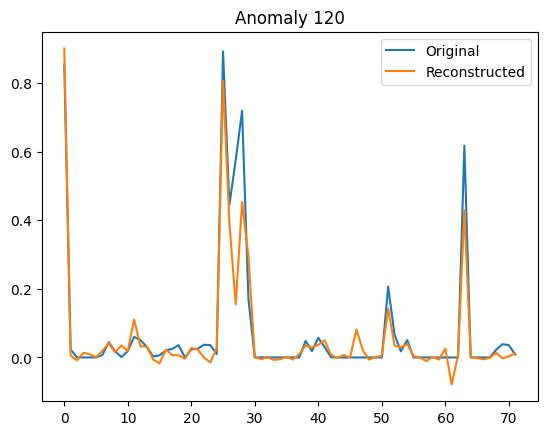

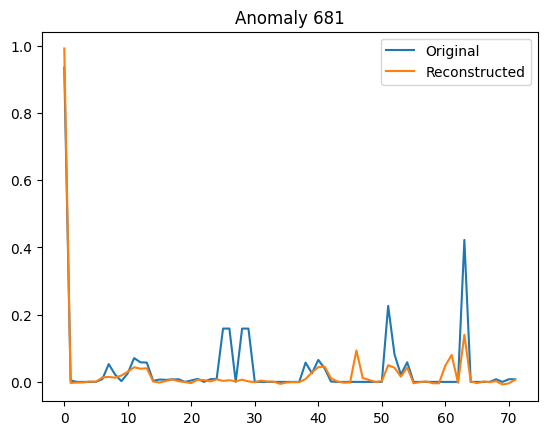

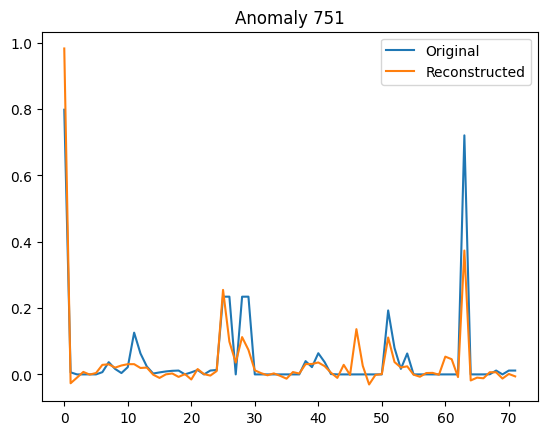

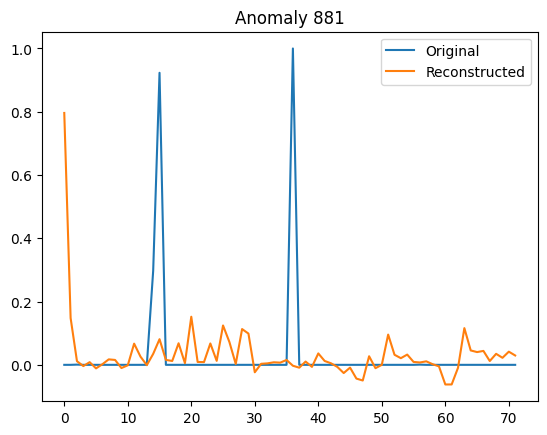

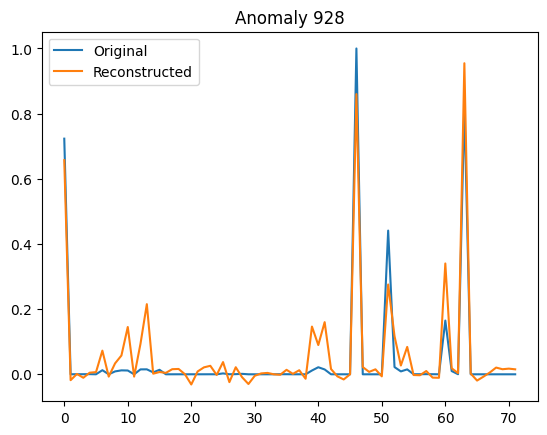

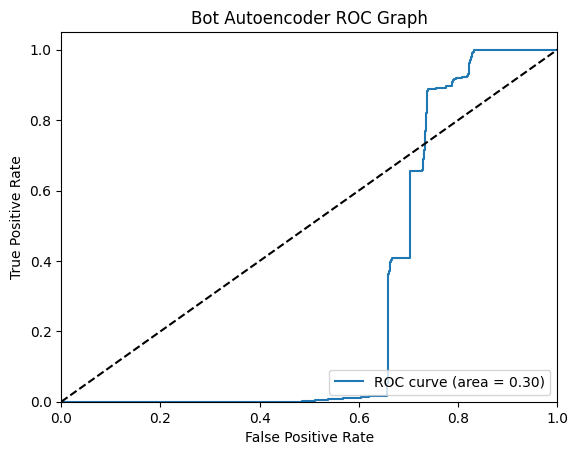

In [ ]:
reconstructed_data = autoencoder.predict(x_test_transformed)
mse = np.mean(np.square(x_test_transformed - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)  # Example threshold

# Identify anomalies based on threshold
anomalies = mse > threshold

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, mse)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, anomalies).ravel()

# Calculate precision, recall, and F1-score using a threshold
# Choose threshold based on precision-recall curve or custom value
custom_threshold = 0.5  # Example threshold
anomalies_custom = mse > custom_threshold
precision_custom = precision_score(y_test, anomalies_custom)
recall_custom = recall_score(y_test, anomalies_custom)
f1_custom = f1_score(y_test, anomalies_custom)

# Print AUC-ROC
print(f"AUC-ROC: {auc_roc}")
# Print Confusion Matrix
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Visualize reconstructed vs. original data for anomalies
anomaly_indices = np.where(anomalies)[0][:5]  # Choose first 5 anomalies for visualization
for idx in anomaly_indices:
    plt.figure()
    plt.title(f"Anomaly {idx}")
    plt.plot(x_test_transformed[idx], label='Original')
    plt.plot(reconstructed_data[idx], label='Reconstructed')
    plt.legend()
    plt.show()

plot_roc('Bot Autoencoder',mse,y_test)

In [ ]:
print('Done!')

Done!
